In [1]:
import numpy as np
import pandas as pd

# scikit
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# nltk
import nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk.corpus import wordnet

In [2]:
df = pd.read_csv('bbc_text_cls.csv')
df

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business
...,...,...
2220,BT program to beat dialler scams\n\nBT is intr...,tech
2221,Spam e-mails tempt net shoppers\n\nComputer us...,tech
2222,Be careful how you code\n\nA new European dire...,tech
2223,US cyber security chief resigns\n\nThe man mak...,tech


In [3]:
inputs = df['text']
labels = df['labels']

<AxesSubplot: >

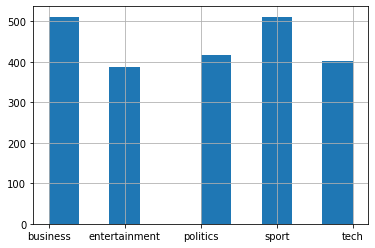

In [4]:
labels.hist()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.33, random_state=123)

In [6]:
vectorizor = CountVectorizer()

In [7]:
Xtrain = vectorizor.fit_transform(X_train)
Xtest = vectorizor.transform(X_test)

In [8]:
X_train

15      China keeps tight rein on credit\n\nChina's ef...
960     Guantanamo pair's passport ban\n\nThe governme...
1077    Anti-terror plan faces first test\n\nPlans to ...
1080    Police probe BNP mosque leaflet\n\nPolice are ...
2030    How to smash a home computer\n\nAn executive w...
                              ...                        
1147    Blair 'said he would stand down'\n\nTony Blair...
2154    IBM puts cash behind Linux push\n\nIBM is spen...
1766    Hingis hints at playing comeback\n\nMartina Hi...
1122    Clarke faces ID cards rebellion\n\nCharles Cla...
1346    Athens memories soar above lows\n\nWell, it's ...
Name: text, Length: 1490, dtype: object

In [9]:
(Xtrain != 0).sum()

301284

In [10]:
model = MultinomialNB()

In [11]:
model.fit(Xtrain,y_train)

MultinomialNB()

In [12]:
print('training scor',model.score(Xtrain,y_train))
print('training scor',model.score(Xtest,y_test))

training scor 0.9932885906040269
training scor 0.9687074829931973


In [13]:
# with stopwords
vectorizor = CountVectorizer(stop_words='english')
Xtrain = vectorizor.fit_transform(X_train)
Xtest  = vectorizor.transform(X_test)
model  = MultinomialNB()
model.fit(Xtrain,y_train)
print('training scor',model.score(Xtrain,y_train))
print('training scor',model.score(Xtest,y_test))

training scor 0.9932885906040269
training scor 0.9714285714285714


In [14]:
# with stemmer
vectorizor = CountVectorizer(stop_words='english')
analyzer   = vectorizor.build_analyzer()
stemmer = PorterStemmer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))
vectorizor = CountVectorizer(stop_words='english',analyzer=analyzer)
Xtrain = vectorizor.fit_transform(X_train)
Xtest  = vectorizor.transform(X_test)
model  = MultinomialNB()
model.fit(Xtrain,y_train)
print('training scor',model.score(Xtrain,y_train))
print('training scor',model.score(Xtest,y_test))

training scor 0.9932885906040269
training scor 0.9714285714285714


In [15]:
def get_wordnet_pos(tag):
    if tag .startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('R'):
        return wordnet.VERB
    else:
        return wordnet.NOUN
    

In [16]:
class LemmaTokenizer:
    def __init__(self):
        self.wordnet = WordNetLemmatizer()
    def __call__(self,doc):
        tokens = word_tokenize(doc)
        word_and_tag = nltk.pos_tag(tokens)
        return [self.wordnet.lemmatize(word,pos=get_wordnet_pos(tag)) \
               for word,tag in word_and_tag]

In [17]:
# with lemmatization
vectorizor = CountVectorizer(tokenizer=LemmaTokenizer())
Xtrain = vectorizor.fit_transform(X_train)
Xtest  = vectorizor.transform(X_test)
model  = MultinomialNB()
model.fit(Xtrain,y_train)
print('training score ', model.score(Xtrain,y_train))
print('test score    ' , model.score(Xtest,y_test))

training score  0.9939597315436242
test score     0.9659863945578231


In [18]:
class StemTokenizor:
    def __init__(self):
        self.stem = PorterStemmer()
    def __call__(self,doc):
        tokens = word_tokenize(doc)
        return [self.stem.stem(token) \
                for token in tokens]

In [19]:
# with stemmer
vectorizor = CountVectorizer(tokenizer=StemTokenizor())
Xtrain     = vectorizor.fit_transform(X_train)
Xtest      = vectorizor.transform(X_test)
model = MultinomialNB()
model.fit(Xtrain,y_train)
print('training score ', model.score(Xtrain,y_train))
print('test score     ', model.score(Xtest,y_test))

training score  0.9919463087248322
test score      0.9659863945578231


In [20]:
# with simple tokenizor
def simple_tokenizor(doc):
    return doc.split()

vectorizor = CountVectorizer(tokenizer=simple_tokenizor)
Xtrain     = vectorizor.fit_transform(X_train)
Xtest      = vectorizor.transform(X_test)
model = MultinomialNB()
model.fit(Xtrain,y_train)
print('training score ', model.score(Xtrain,y_train))
print('test score     ', model.score(Xtest,y_test))

training score  0.9953020134228188
test score      0.963265306122449
